In [5]:
from gremlin_python.process.anonymous_traversal import traversal
from gremlin_python.driver.driver_remote_connection import DriverRemoteConnection
from gremlin_python.driver import client, serializer
import pandas as pd
import matplotlib.pyplot as plt
import nest_asyncio
import csv
import psutil
import time
nest_asyncio.apply()

In [2]:
csv_path = "/home/smeet/Downloads/Bajaj Mall Data.csv"
tsv_path = "/home/smeet/Downloads/edgelist.txt"

In [8]:
g = traversal().withRemote(DriverRemoteConnection('ws://localhost:8182/gremlin','g'))

In [ ]:
query = g.V().drop()
query.iterate()

In [3]:
def create_graph_node(label, properties):
    try:
        # Prepare the query to add a node
        query = g.addV(label)

        # Add properties to the node
        for key, value in properties.items():
            query = query.property(key, value)

        # Execute the query
        result_set = query.toList()
    finally:
        return result_set

In [4]:
def get_node_properties_by_id(node_id):
    result = "Pending"
    try:
        # Prepare the query to get the node by its ID
        query = g.V(node_id)

        # Execute the query and get the properties of the node
        result_set = query.valueMap(True).toList()

        if result_set:
            # The query returns a list of dictionaries with properties as keys and lists of values.
            # Since we queried for a single node, we extract the first element from the list.
            node_properties = result_set[0]
            result =  node_properties
        else:
            result = None

    finally:
        return result

In [6]:
memory_usage = []
cpu_utilization = []
timestamps = []

In [7]:
memory_usage.append(psutil.virtual_memory().used)
cpu_utilization.append(psutil.cpu_percent(interval=None, percpu=False))
timestamps.append(time.time())

In [9]:
# Open the CSV file in read mode
with open(csv_path, mode='r', newline='') as csvfile:
    # Create a CSV reader object
    csv_reader = csv.reader(csvfile)
    
    # Read and process each row in the CSV file
    for row in csv_reader:
        # 'row' will be a list representing each row in the CSV file
        # You can access individual elements in the row using their indexes
        id = row[0]
        name = row[1]
        category = row[2]
        price = row[3]
        rating = row[4]
        
        
        node_label = "product"
        node_properties = {
            "id": id,
            "name": name,
            "category": category,
            "price":price,
            "rating":rating
        }
        created_node = create_graph_node(node_label, node_properties)
        memory_usage.append(psutil.virtual_memory().used)
        cpu_utilization.append(psutil.cpu_percent(interval=None, percpu=False))
        timestamps.append(time.time())
        print("Created Node:", created_node)

Created Node: [v[41048]]
Created Node: [v[139328]]
Created Node: [v[143424]]
Created Node: [v[147520]]
Created Node: [v[172128]]
Created Node: [v[45144]]
Created Node: [v[65640]]
Created Node: [v[69736]]
Created Node: [v[73832]]
Created Node: [v[155832]]
Created Node: [v[151616]]
Created Node: [v[77936]]
Created Node: [v[159928]]
Created Node: [v[164024]]
Created Node: [v[176224]]
Created Node: [v[168120]]
Created Node: [v[172216]]
Created Node: [v[176312]]
Created Node: [v[180408]]
Created Node: [v[180320]]
Created Node: [v[184504]]
Created Node: [v[77928]]
Created Node: [v[188600]]
Created Node: [v[155712]]
Created Node: [v[184416]]
Created Node: [v[82024]]
Created Node: [v[159808]]
Created Node: [v[192696]]
Created Node: [v[188512]]
Created Node: [v[82032]]
Created Node: [v[49240]]


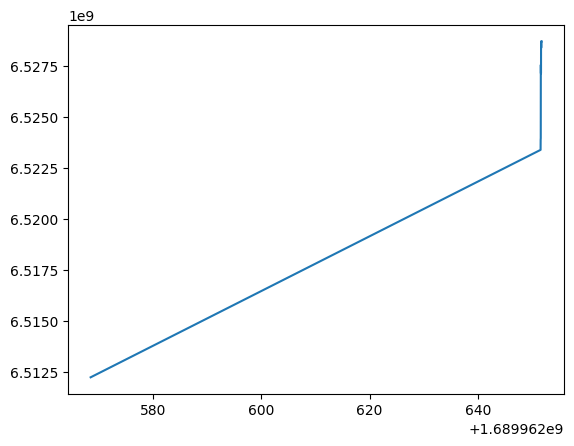

In [12]:
plt.plot(timestamps,memory_usage)

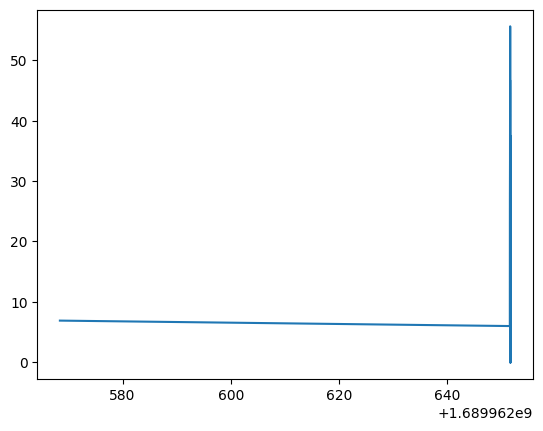

In [13]:
plt.plot(timestamps,cpu_utilization)